In [1]:
HTML_MODE = True
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

### 週販レポート2025年版
# 標準ライブラリ
import os
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch

# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

show_title(report_date)

if not HTML_MODE:
    plt.show()

# 国内ゲームハード週販レポート (2025-10-12) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 一部のデータは処理上の都合により、週次値に調整しています。
* [過去の週販レポート](index.html)

## 直近4週間のハード売り上げ／累計推移

嵐の前の静けさ、目立った変化のない週です。
PS5も通常の水準よりも若干高めですが元に戻りSwitchを下回っています。

来週は大きな動きが予想されます。

- Nintendo Switch2 Pokemon ZA同梱版
- PS5 AUTUMN SALE (10/17~10/23)

どこまで売り上げが伸びるか注目です

In [2]:
def chart_4weeks() -> None:
    df1 = hs.load_hard_sales()
    # 4 weeks before
    before_4weeks = hs.current_report_date(df1) - Timedelta(weeks=4-1)
    (out1, style1) = ch.chart_units_by_date_hw(df1, begin=before_4weeks)
    display(style1)
    
chart_4weeks()

## 2025年の週販推移

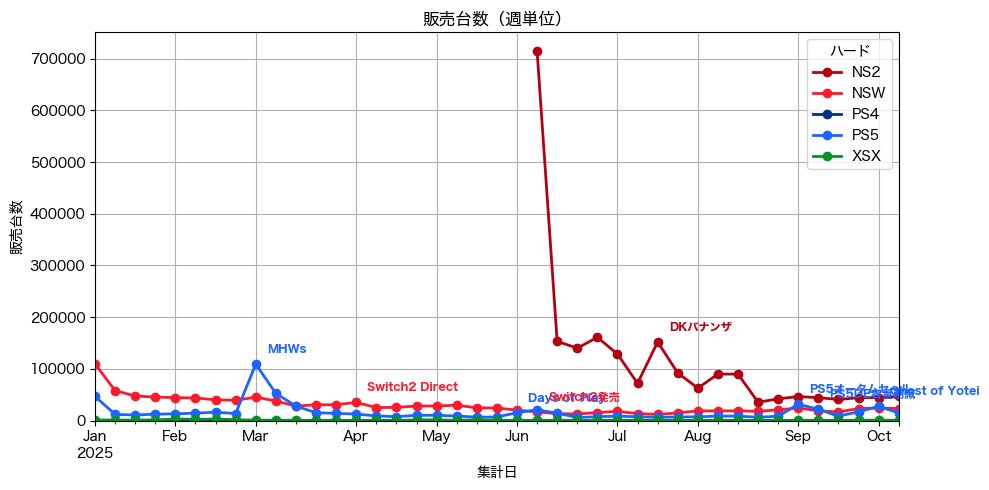

In [4]:
(fig, df) = ph.plot_sales(begin=datetime(2025,1,1), event_mask = report_event_mask)

### 2025年の週販推移(拡大）

PS5はGhost of Yoteiの効果が切れて下に戻りつつありますが、次週にはAUTUMN SALEの効果が乗ってくるので2万台も期待できます。

Switchは極めて安定しています。来週はZAなのですが、Switch2が十分供給された場合には、次回は減る可能性もあります。


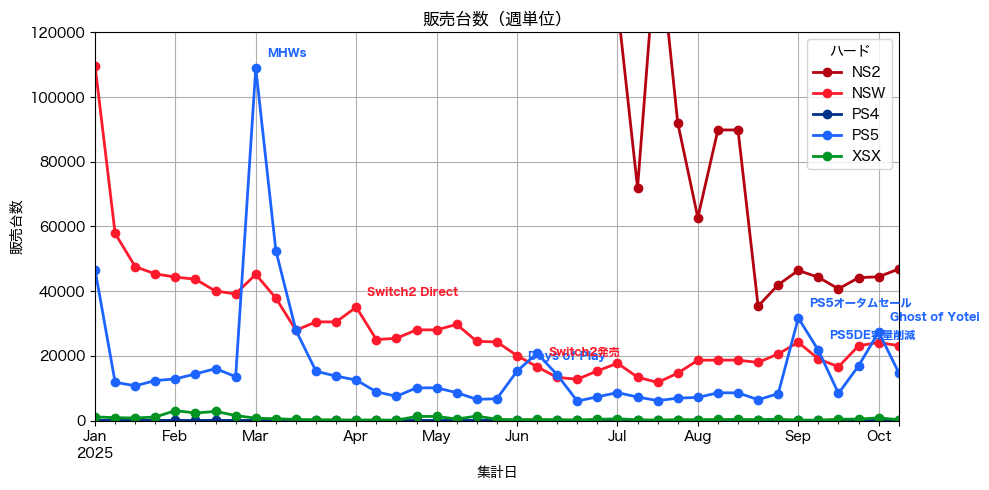

In [6]:
(fig, df) = ph.plot_sales(begin=datetime(2025,1,1), ymax=120000, event_mask=report_event_mask)

## 2025年月間販売推移

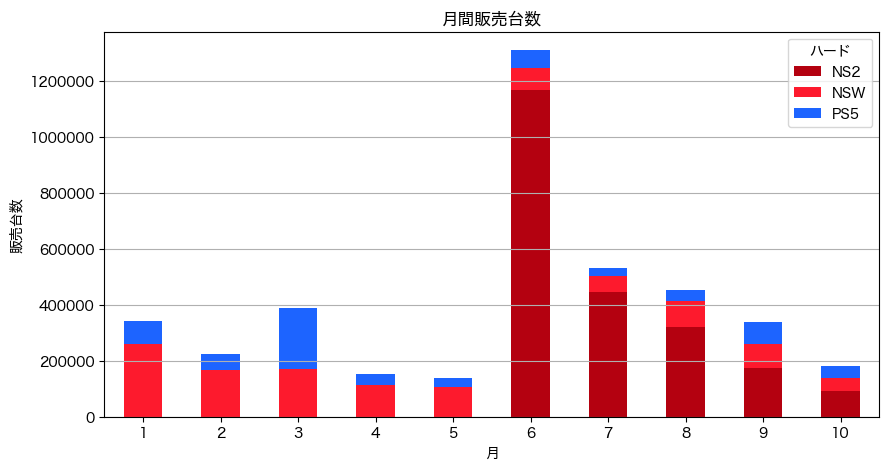

In [7]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW"], year=2025, stacked=True)

In [8]:
df = df.style.format({'NS2': '{:,.0f}', 'NSW': '{:,.0f}', 'PS5': '{:,.0f}'})
display(df)

### Nintendo Switchの月間販売台数： 2023,2024年との比較

10月の前年比も9月に続いて低くなりそうな気配です。
ZAも出ますし、10月はSwitch2のデマンドが強いのでSwitchは控えめな値になると思われます。

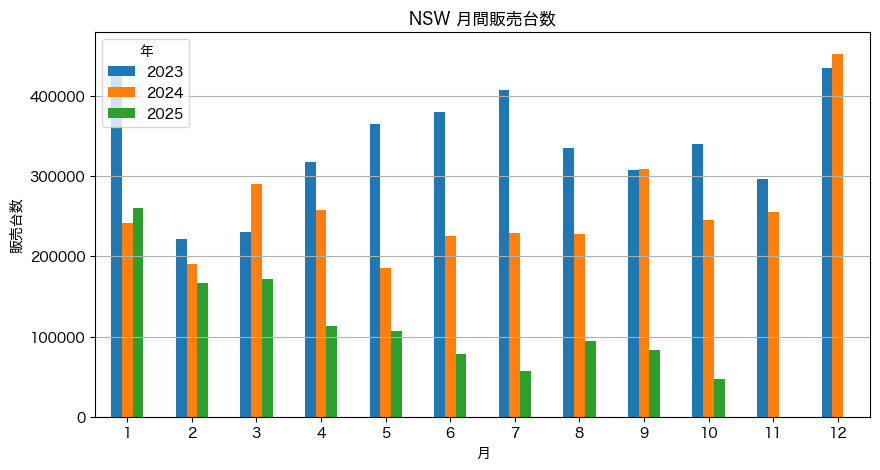

In [10]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=datetime(2023,1,1), end=datetime(2025,10,12))

### PlayStation 5の月間販売台数： 2023, 2024年との比較

2025年10月のPS5は前年10月を超えるのは確実です。
4月から8月までは、大きく前年割れしていたPS5ですが、9月、10月と盛り返しつつあります。


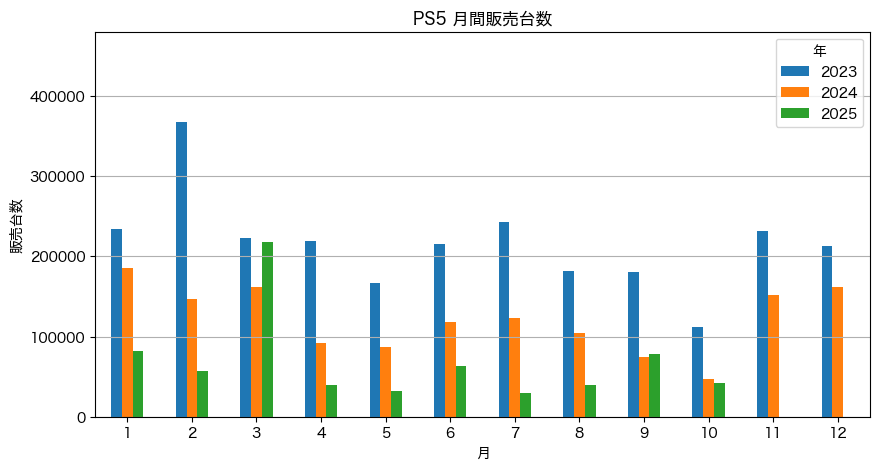

In [11]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=datetime(2023,1,1), end=datetime(2025,10,12))

## 累計販売推移

累計については、Switch2の年末商戦で変化があるでしょう。

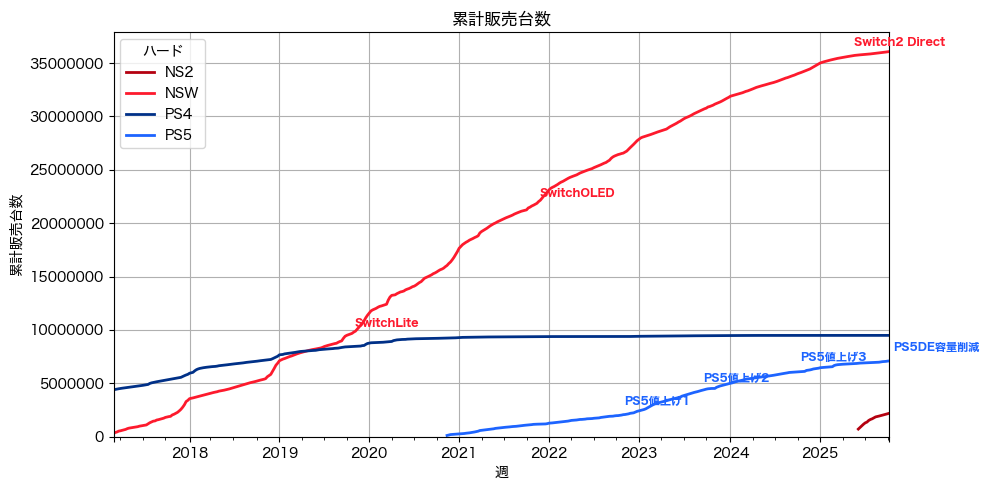

In [12]:
long_range_event_mask = he.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(fig, df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW'], begin=datetime(2017,3,1), event_mask = long_range_event_mask)


## Switch2販売状況

### 歴代機種との比較

ZA発売直前週です。予想通りSwitch2の推移はPS2に約2万台差まで接近しつつも上回っています。
Switch2は歴代2位の初動を維持しながらZAを迎えます。

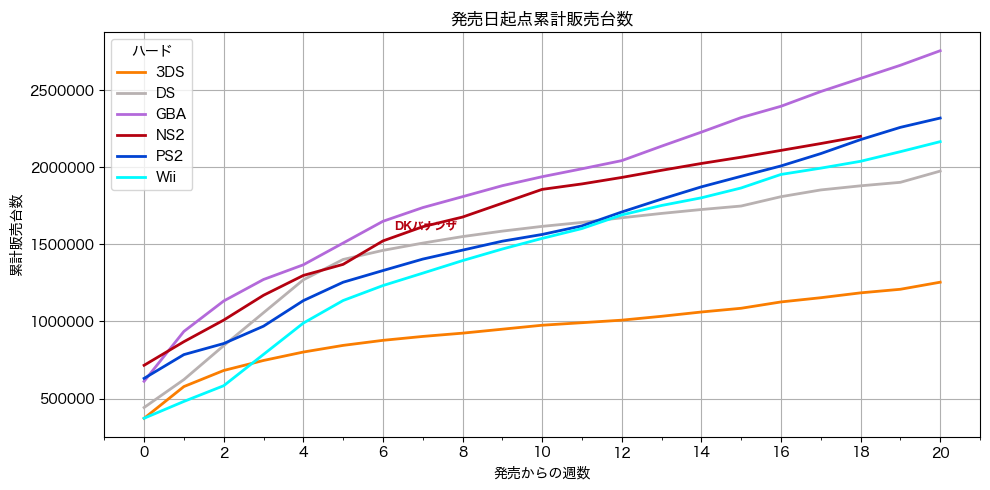

In [22]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS"], 
                                        mode="week", xgrid=2, end=20,
                                        event_mask=report_event_mask)

In [24]:
df12 = df.iloc[df.index == 18]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)
display(df12_unpivot.style.format({'販売数': '{:,.0f}'}))

## Switch/Switch2ロンチ比較

#### 次週に注目のSwitch2出荷台数

ロンチ週以降のSwitchとSwitch2の販売状況の比較です。
8月以降、徐々に増えてはいますが5万台を下回る状況が続いています。
来週のZA同梱版でどこまで増えるか注目です。DKバナンザ発売時の15万台程度まで増えると素晴らしいですが、どこまで出荷できるか。

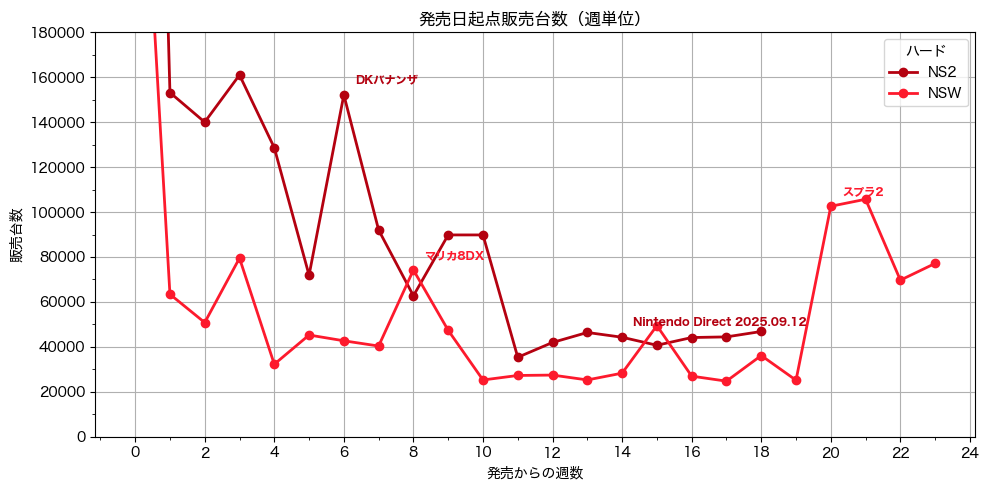

In [17]:
switch_event_mask = he.EventMasks(hard=5, event=2, soft=3, price=0, sale=0)
(fig, df) = ph.plot_sales_by_delta(hw=["NSW", "NS2"], 
                                   end=23, ymax=180000, xgrid=2, ygrid=20000, mode="week", 
                                   event_mask=switch_event_mask)


## 年単位の状況

(2025年については10月第1週までの状況です)

全機種合わせた年毎のハード販売の状況です。
2025年は500万台を超える見込みですが、600万台到達は難しそうです。


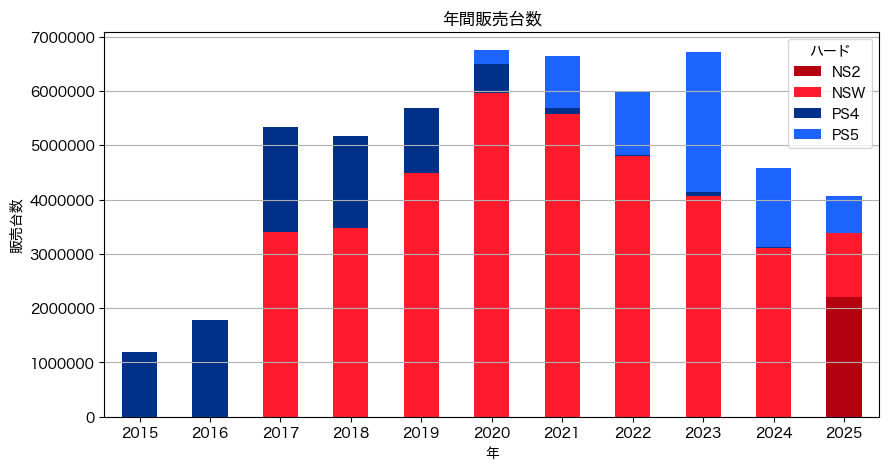

In [18]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2'], 
                                       begin=datetime(2015,1,1), 
                                       end=datetime(2025,12,31), stacked=True)